In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [49]:
bac = pd.read_csv('BAC.csv', index_col = 'Date', parse_dates = [0])
jpm = pd.read_csv('JPM.csv', index_col = 'Date', parse_dates = [0])
citi = pd.read_csv('C.csv', index_col = 'Date', parse_dates = [0])
hsbc= pd.read_csv('HSBC.csv', index_col = 'Date', parse_dates = [0])
ry= pd.read_csv('RY.csv', index_col = 'Date', parse_dates = [0])

In [51]:
portfolio_list = [bac,jpm,citi,hsbc,ry]


In [55]:
portfolio_dict = {'BAC':bac,'JPM':jpm,'C':citi,'HSBC':hsbc,'RY':ry}

In [57]:
bac.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,42.630001,42.630001,41.630001,41.660000,41.447601,44855600
2021-08-31,41.669998,42.070000,41.360001,41.750000,41.537144,54654600
2021-09-01,41.750000,41.779999,41.029999,41.189999,40.980000,52361900
2021-09-02,41.110001,41.490002,40.639999,41.020000,41.020000,44538900
2021-09-03,41.020000,41.189999,40.680000,41.049999,41.049999,41812400


In [ ]:
2016-09-06	
2021-09-03	

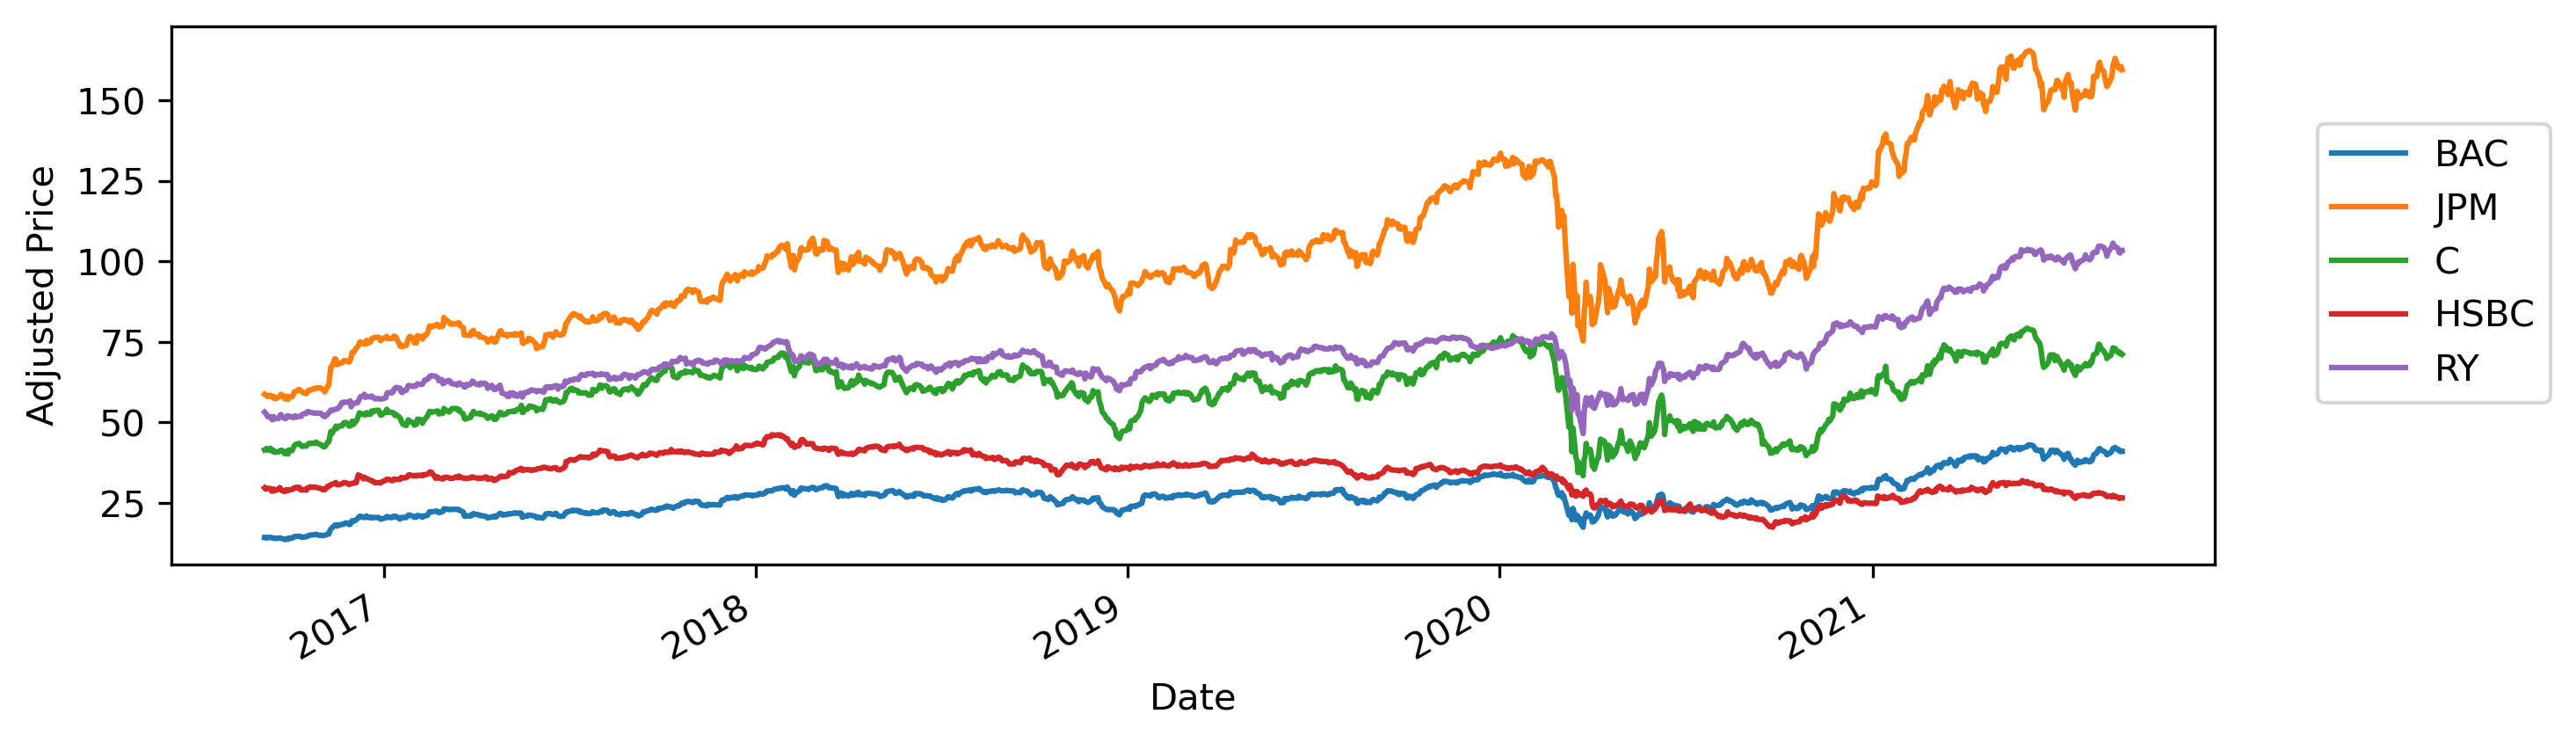

In [137]:
portfolio_list = [bac,jpm,citi,hsbc,ry]
portfolio_list_str = ['bac','jpm','citi','hsbc','ry']
portfolio_dict = {'BAC':bac,'JPM':jpm,'C':citi,'HSBC':hsbc,'RY':ry}

def plot_port(portfolio_list):
    plt.figure(dpi=300, figsize=(10,3))
    plt.xlabel('Date(Year)')
    plt.ylabel('Adjusted Price')
    for port in portfolio_dict:
        t1 = portfolio_dict[port]
        t1['Adj Close'].plot(label = f'{port}')
        plt.legend(loc = (1.05,0.3))


plot_port(portfolio_list)

In [451]:
def perc_change(df, time1, time2):
    time1s = pd.to_datetime(time1)
    time2s = pd.to_datetime(time2)
    result = (df['Adj Close'][time2s] - df['Adj Close'][time1s])/df['Adj Close'][time1s]
    return 'Percentage change:' + str(np.round(result *100)) +'%'

perc_change(bac,'2016-09-06','2021-09-03')

KeyError: Timestamp('2016-09-06 00:00:00')

Text(0.5, 0, 'Daily Return')

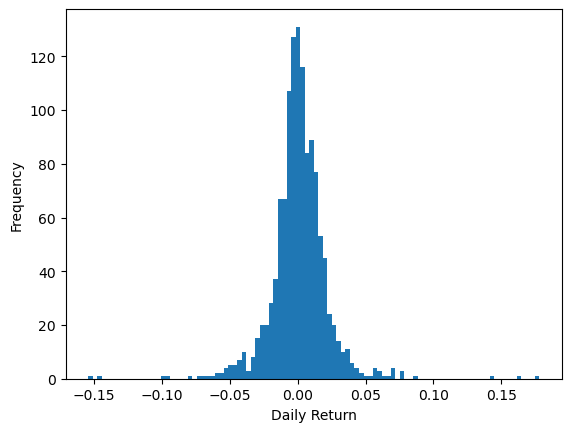

In [419]:
bac['Daily Return']  = bac['Adj Close'].pct_change(1)
bac = bac.dropna()
bac['Daily Return'].plot(kind = 'hist', bins = 100)
plt.xlabel('Daily Return')





Text(0.5, 0, 'Daily Return')

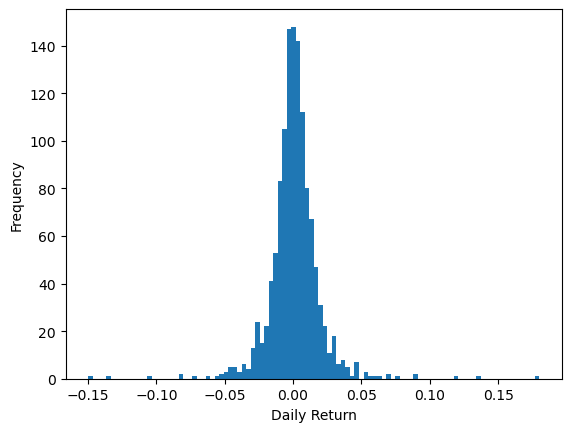

In [220]:
jpm['Daily Return']  = jpm['Adj Close'].pct_change(1)
jpm = jpm.dropna()
jpm['Daily Return'].plot(kind = 'hist', bins = 100)
plt.xlabel('Daily Return')



Text(0.5, 0, 'Daily Return')

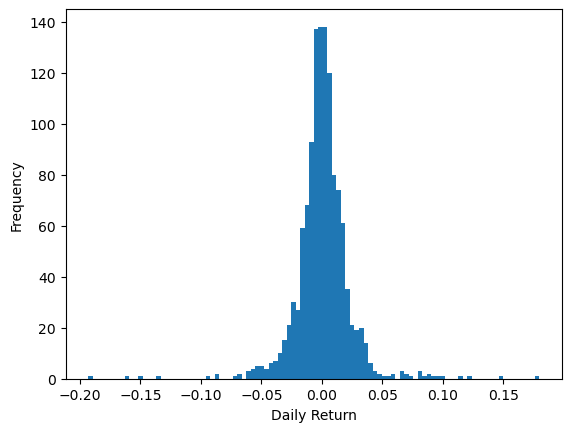

In [222]:
citi['Daily Return']  = citi['Adj Close'].pct_change(1)
citi = citi.dropna()
citi['Daily Return'].plot(kind = 'hist', bins = 100)
plt.xlabel('Daily Return')



Text(0.5, 0, 'Daily Return')

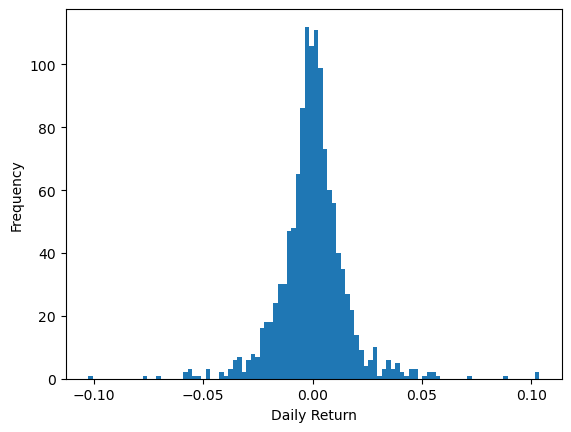

In [226]:
hsbc['Daily Return']  = hsbc['Adj Close'].pct_change(1)
hsbc = hsbc.dropna()
hsbc['Daily Return'].plot(kind = 'hist', bins = 100)
plt.xlabel('Daily Return')



/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_2131/817327410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ry['Daily Return']  = ry['Adj Close'].pct_change(1)


Text(0.5, 0, 'Daily Return')

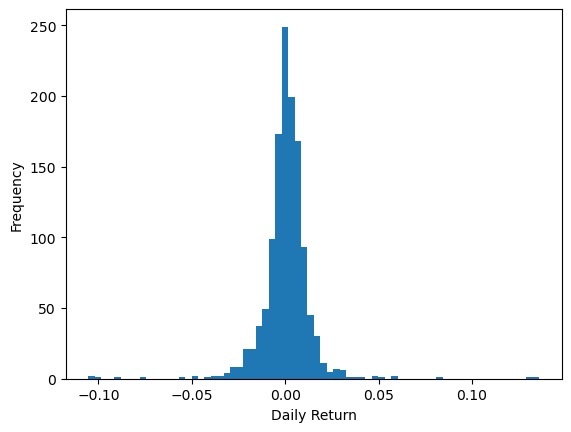

In [441]:
ry['Daily Return']  = ry['Adj Close'].pct_change(1)
ry = ry.dropna()
ry['Daily Return'].plot(kind = 'hist', bins = 70)
plt.xlabel('Daily Return')



In [298]:
bac['Cumulative Return'] = ((1+bac['Daily Return']).cumprod()-1)

In [310]:
bac701 = (bac['Cumulative Return']*10000)+10000

Text(0, 0.5, 'Investment')

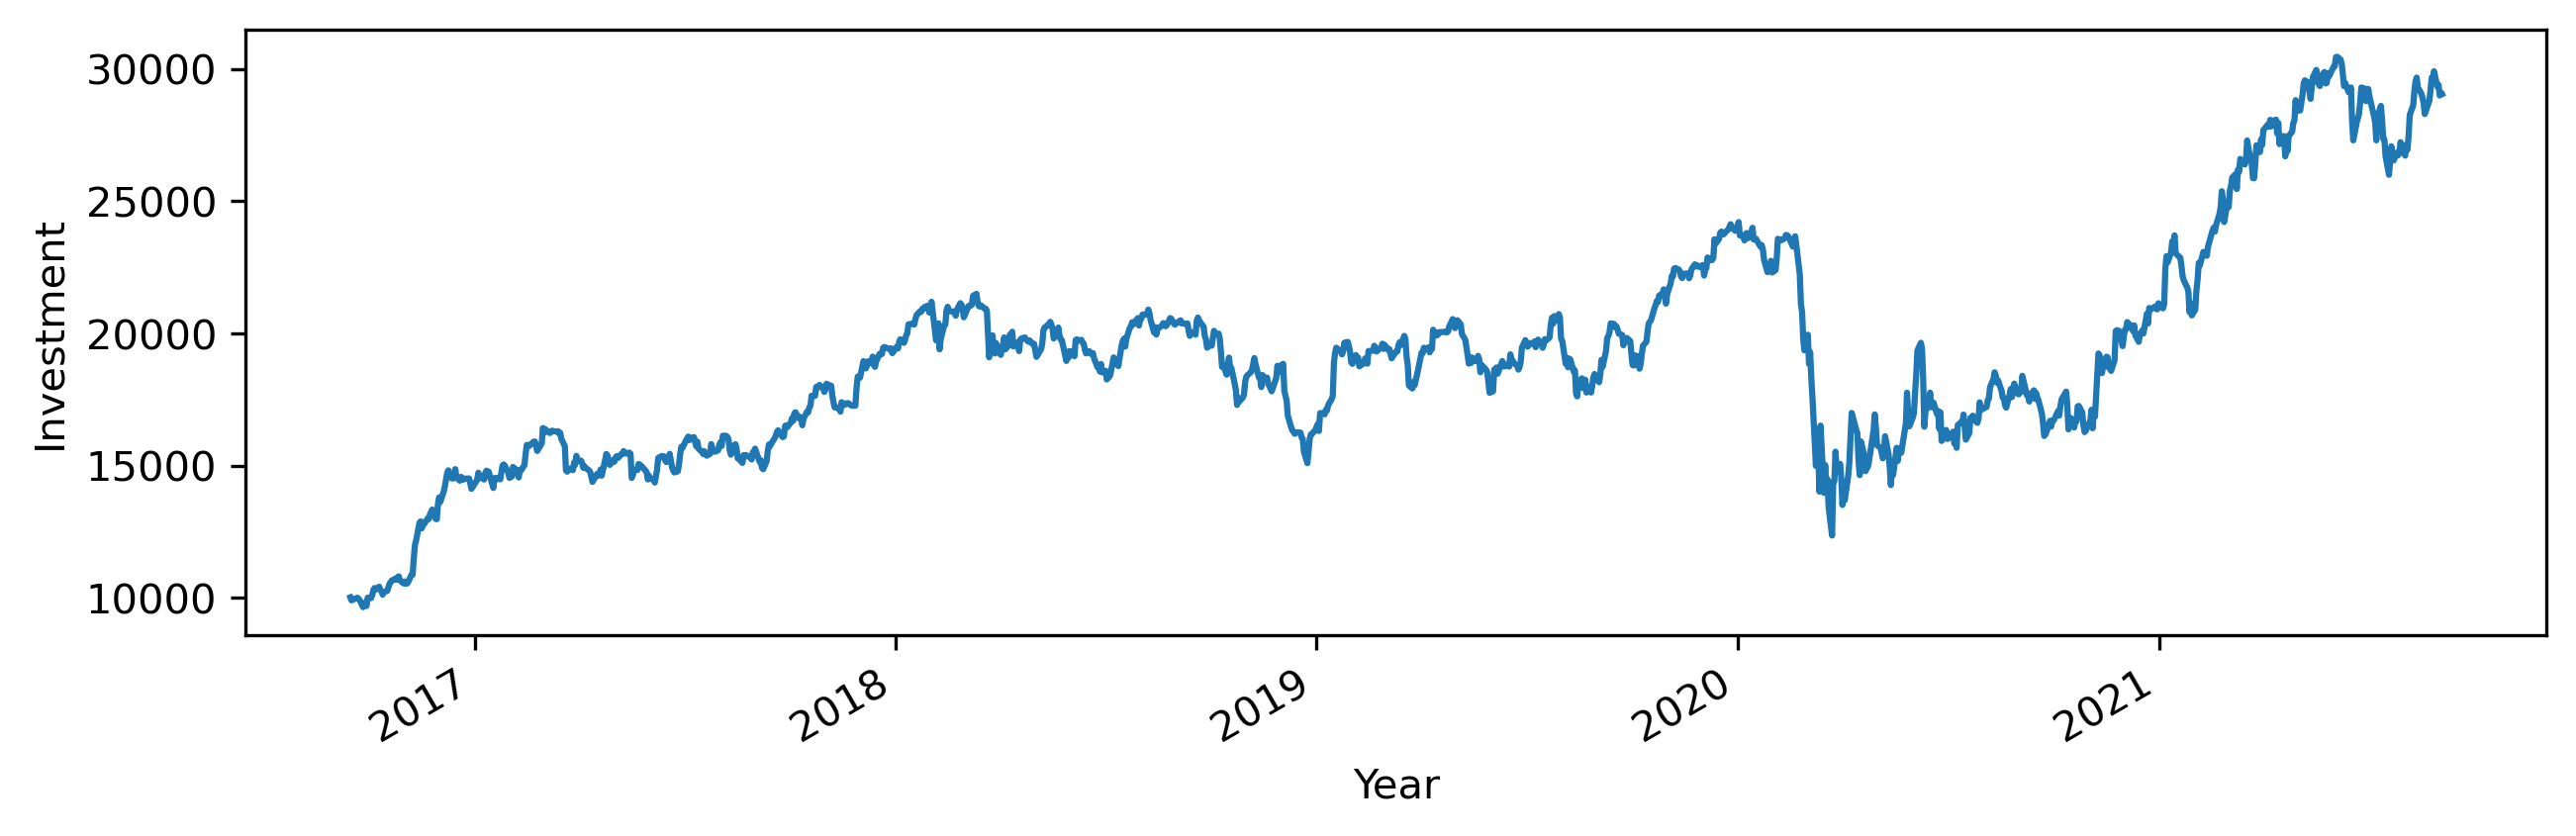

In [316]:
plt.figure(figsize = (10,3), dpi = 300)
bac701.plot()
plt.xlabel('Year')
plt.ylabel('Investment')

In [330]:
def get_sharpe(df):
    return (df['Daily Return'].mean())/(df['Daily Return'].std()) * (252**0.5)

In [336]:
get_sharpe(bac)
get_sharpe(jpm)
get_sharpe(citi)
get_sharpe(hsbc)
get_sharpe(ry)

0.7323176596668234

In [344]:
sharpe_ratio_list = {'bac': get_sharpe(bac),
                    'jpm': get_sharpe(jpm),
                    'citi':get_sharpe(citi),
                    'hsbc':get_sharpe(hsbc),
                    'ry':get_sharpe(ry) }
sharpe_ratio_list

{'bac': 0.8024999142577588,
 'jpm': 0.8165069200136577,
 'citi': 0.47918276513516356,
 'hsbc': 0.03389350547471227,
 'ry': 0.7323176596668234}

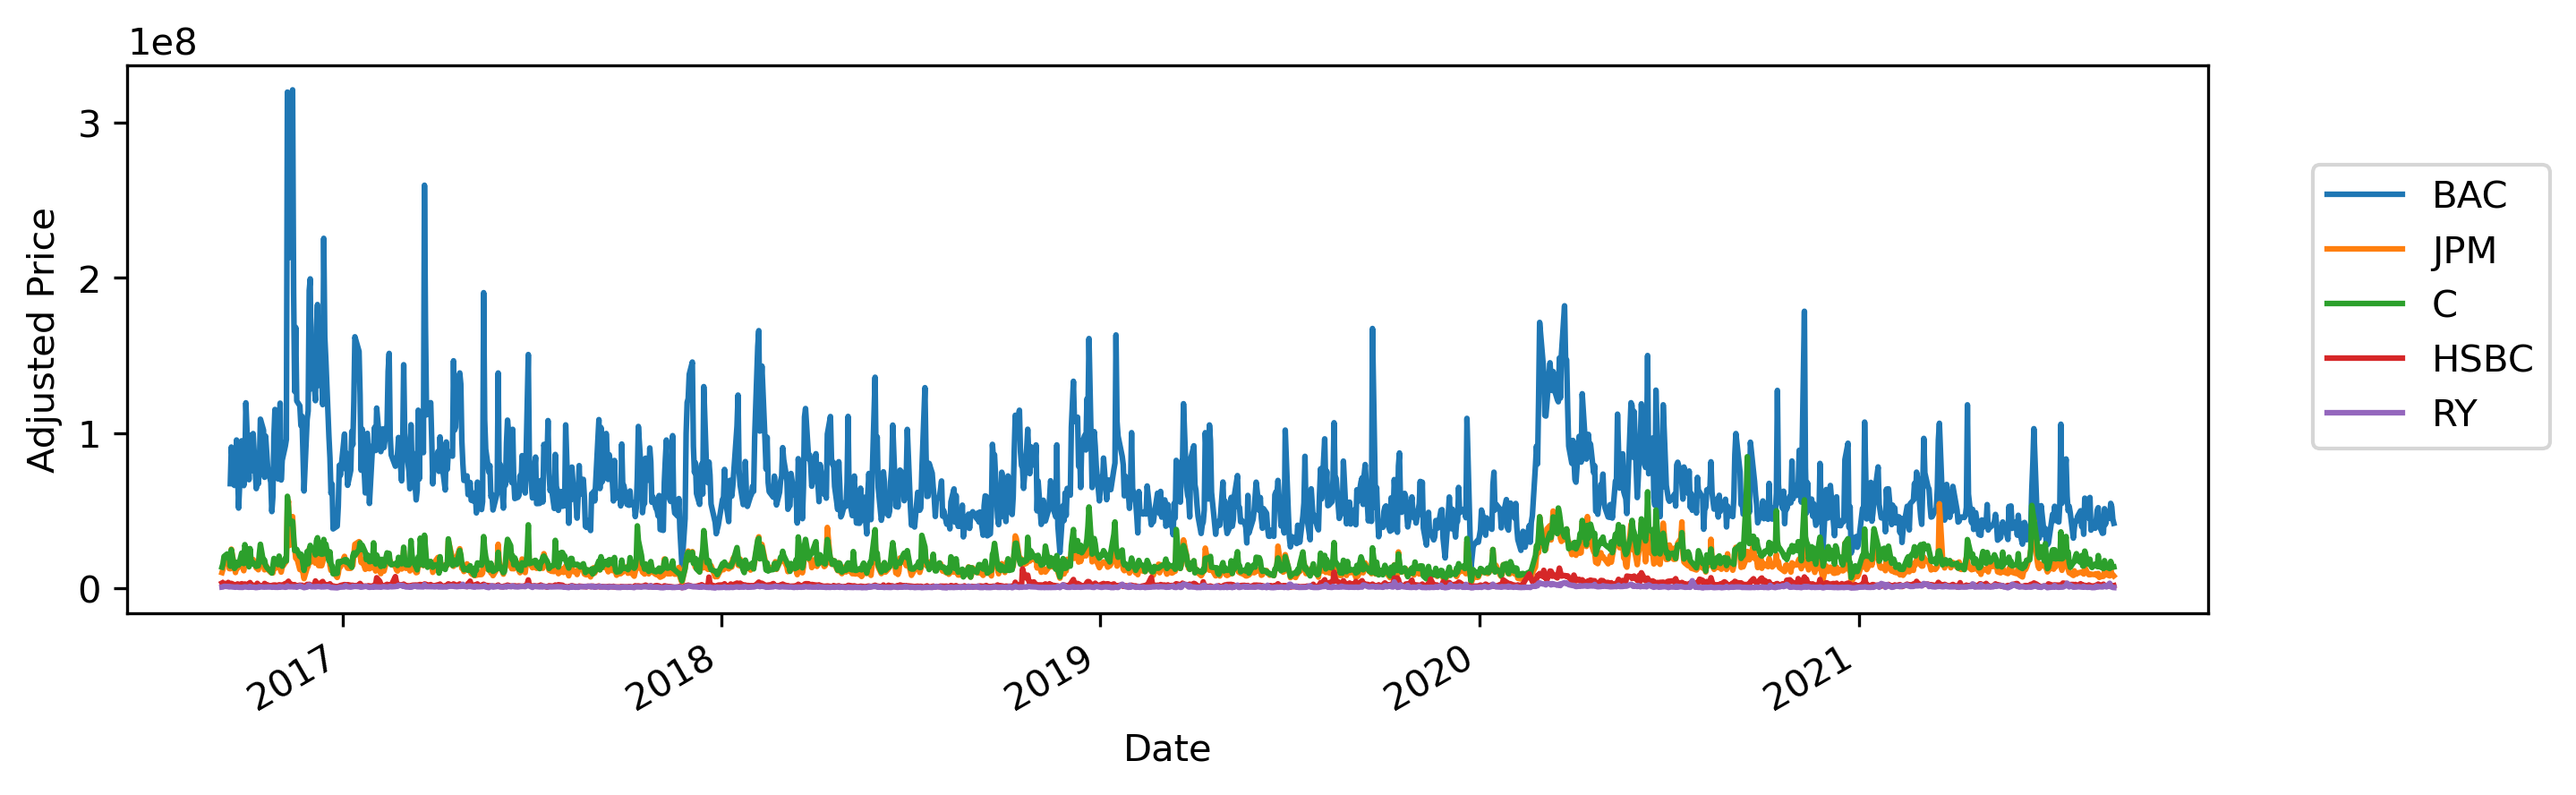

In [354]:
portfolio_dict = {'BAC':bac,'JPM':jpm,'C':citi,'HSBC':hsbc,'RY':ry}
def plot_port(portfolio_list):
    plt.figure(dpi=300, figsize=(10,3))
    plt.xlabel('Date(Year)')
    plt.ylabel('Adjusted Price')
    for port in portfolio_dict:
        t1 = portfolio_dict[port]
        t1['Volume'].plot(label = f'{port}')
        plt.legend(loc = (1.05,0.3))
plot_port(portfolio_dict)

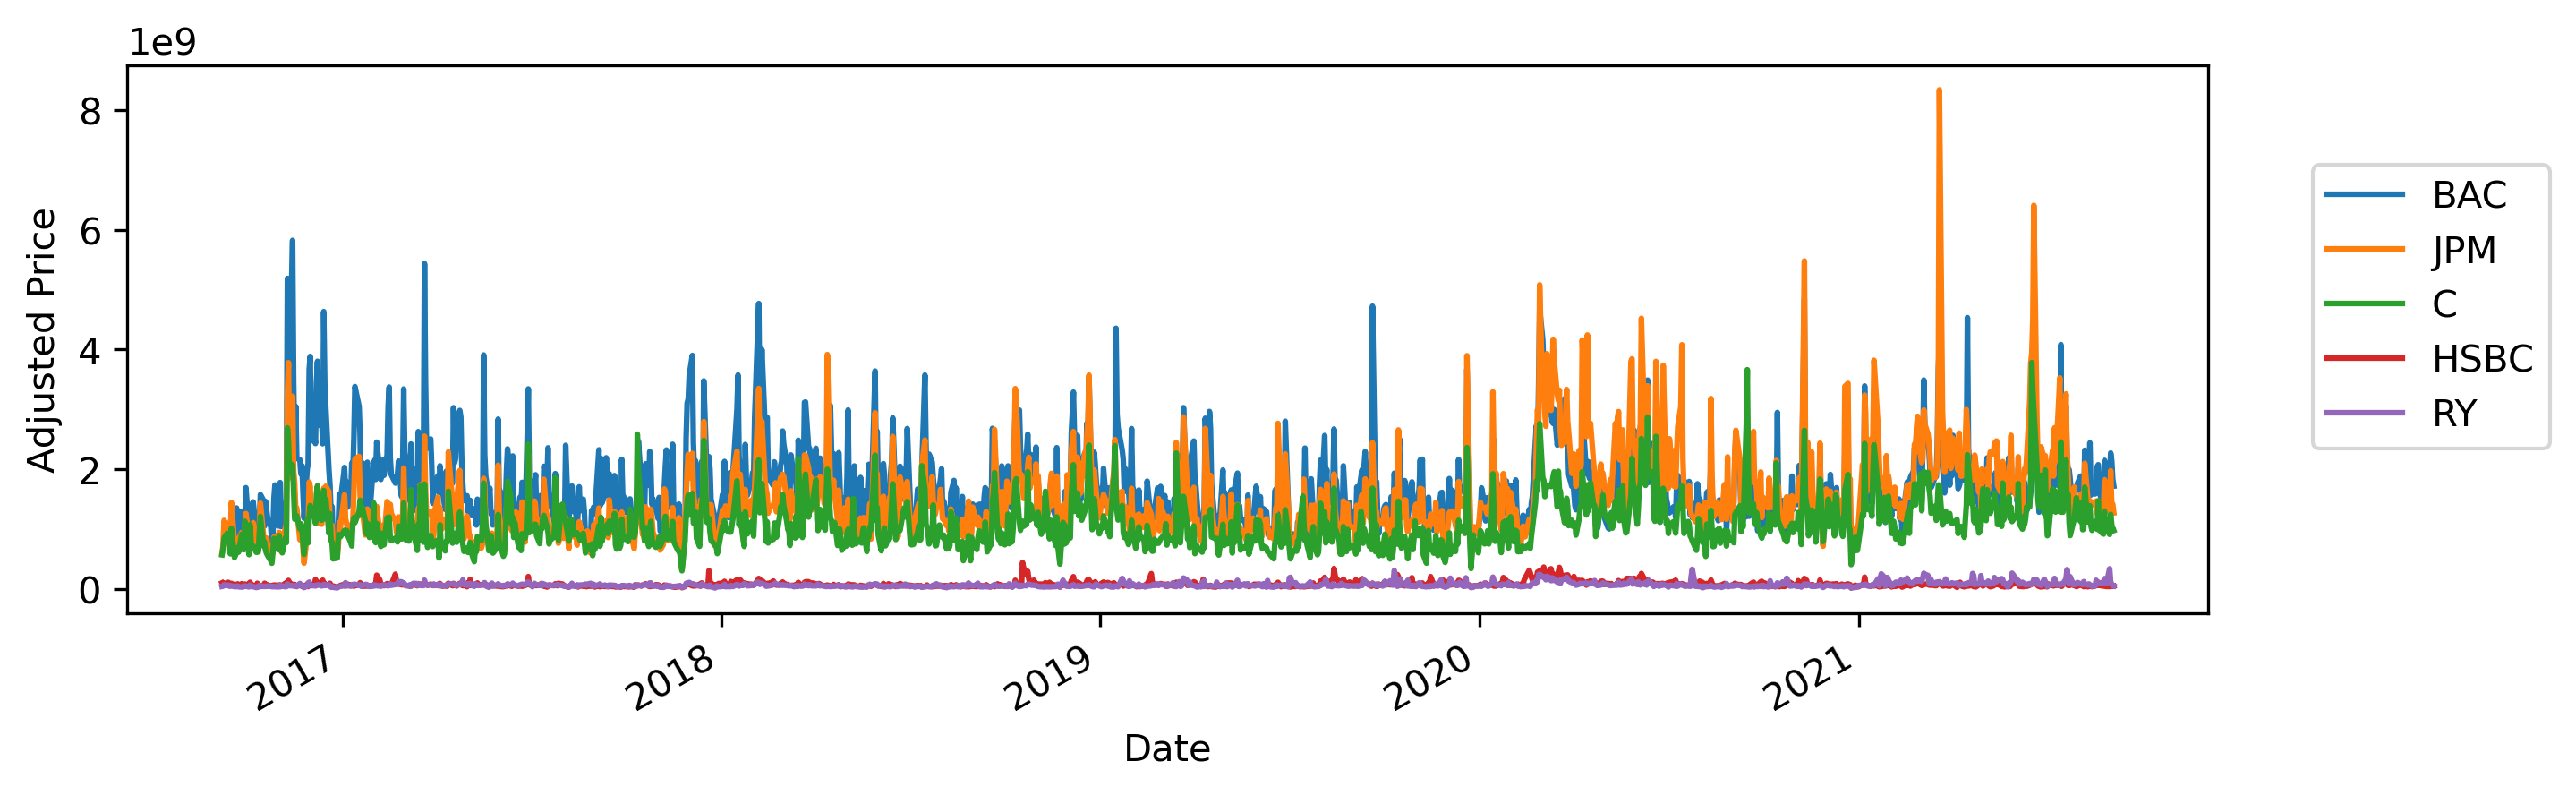

In [380]:
portfolio_dict = {'BAC':bac,'JPM':jpm,'C':citi,'HSBC':hsbc,'RY':ry}
def plot_port(portfolio_list):
    plt.figure(dpi=300, figsize=(10,3))
    plt.xlabel('Date(Year)')
    plt.ylabel('Adjusted Price')
    for port in portfolio_dict:
        t1 = portfolio_dict[port]
        t2 = t1['Volume'] * t1['Adj Close'] 
        t2.plot(label = f'{port}')
        plt.legend(loc = (1.05,0.3))
plot_port(portfolio_dict)

In [398]:

jpm['Volume traded'] = jpm['Volume'] * jpm['Adj Close']
jpm['Volume traded'].idxmax()
jpm.loc['2021-03-19']

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_2131/1344099530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpm['Volume traded'] = jpm['Volume'] * jpm['Adj Close']


Open             1.555100e+02
High             1.559400e+02
Low              1.511900e+02
Close            1.551400e+02
Adj Close        1.533479e+02
Volume           5.441880e+07
Daily Return    -1.592132e-02
Volume traded    8.345011e+09
Name: 2021-03-19 00:00:00, dtype: float64

In [ ]:
Volume traded    8.345011e+09

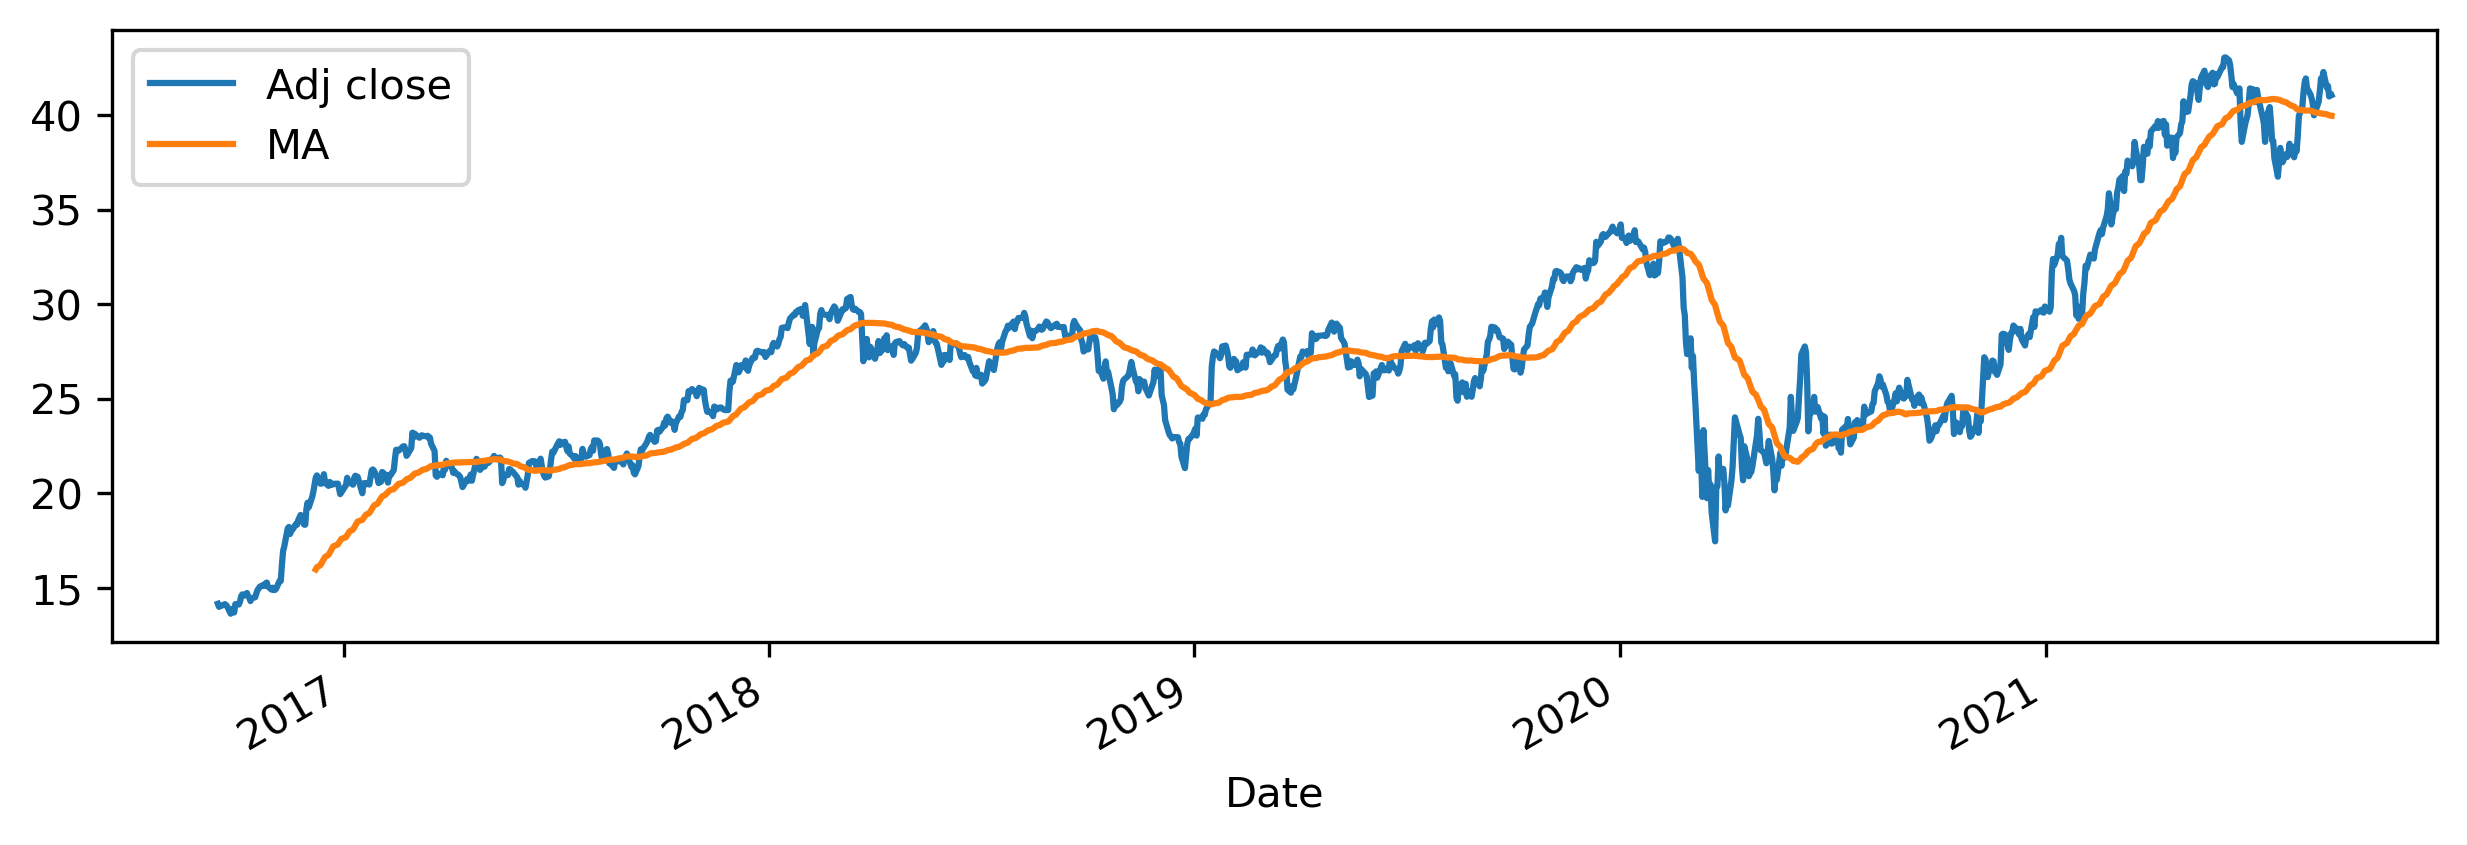

In [415]:
plt.figure(figsize = (10,3), dpi = 300)
bac['Adj Close'].plot(label = 'Adj close')
bac['Adj Close'].rolling(window = 60).mean().plot(label = 'MA')
plt.legend()